In [1]:
import tessreduce as tr

Matplotlib is building the font cache; this may take a moment.


made reference
made source mask
calculating background
background subtracted
Aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
Background correlation correction
Field calibration
Target is above -30 dec, calibrating to PS1 photometry.


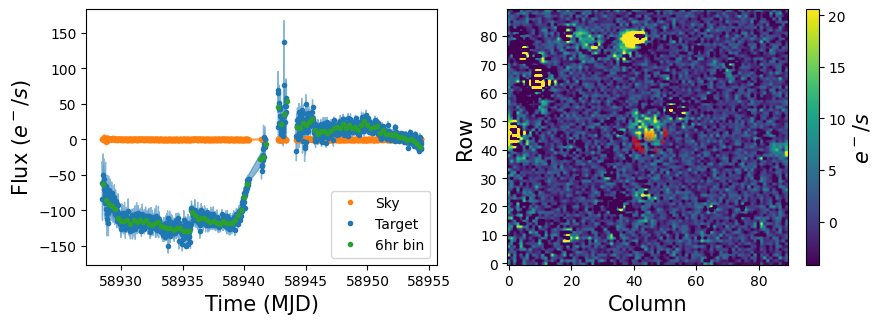

In [2]:
tess = tr.tessreduce(tpf='../../../../data/tess/2020fqv.fits')#ra=ra,dec=dec,size=90)#,sector=sector)

In [3]:
from skimage.util.shape import view_as_windows
def downSample2d(arr,sf):
    #isf2 = 1.0/(sf*sf) # Removed this factor since we don't want scaling
    (A,B) = arr.shape
    windows = view_as_windows(arr, (sf,sf), step = sf)
    return windows.sum(3).sum(2)#*isf2

In [8]:
downSample2d(tess.ref,90)

array([[342220.93233425]])

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
%matplotlib inline

In [49]:
ar = tess.ref
fact = 30
sx, sy = ar.shape
X, Y = np.ogrid[0:sx, 0:sy]
regions = sy//fact * (X//fact) + Y//fact

In [50]:
ind = 6
rx,ry = np.where(regions == ind)

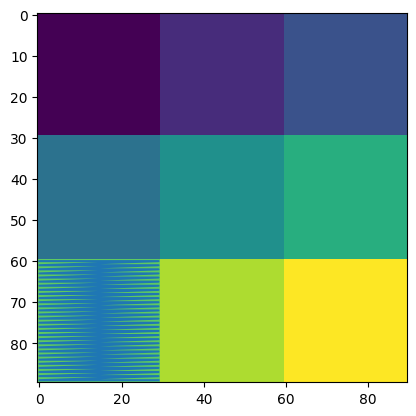

In [51]:
plt.figure()
plt.imshow(regions)
plt.plot(ry,rx)

In [64]:
max_reg

8

In [91]:
ar = tess.ref
fact = 80
sx, sy = ar.shape
X, Y = np.ogrid[0:sx, 0:sy]
regions = sy//fact * (X//fact) + Y//fact
max_reg = np.max(regions)

clip = np.zeros_like(ar)
for i in range(max_reg+1):
    print(max_reg)
    rx,ry = np.where(regions == i)
    m,me, s = sigma_clipped_stats(ar[ry,rx],maxiters=10)
    cut_ind = np.where((ar[rx,ry] >= me+2*s) | (ar[rx,ry] <= me-2*s))
    clip[rx[cut_ind],ry[cut_ind]] = 1


2
2
2


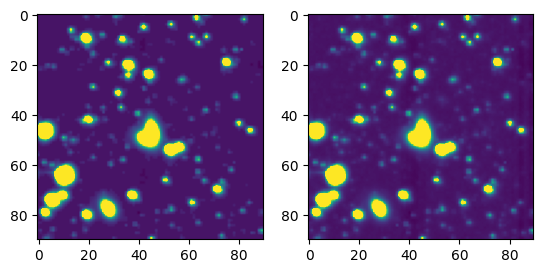

In [93]:
plt.figure()
plt.subplot(121)
plt.imshow(clip*ar,vmax=100)
plt.subplot(122)
plt.imshow(ar,vmax=100)

In [94]:
clip*ar

array([[ 0.        ,  0.        , -0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [ 0.        , -0.        , -0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.        ,  4.06870778,  0.        , ...,  0.        ,
        16.20273147, 32.08021452],
       [ 0.        ,  0.        ,  4.16297699, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 13.53647493, ...,  0.        ,
        -0.        , -0.        ]])